In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')

# Data Cleaning & Preparation

In [ ]:
print(df.head())
print(df.info())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [ ]:
print(df.columns)
print(df.shape)

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')
(200, 4)


In [ ]:
df = df.drop('CustomerID', axis=1)

In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [ ]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [ ]:
df.dtypes

,0
CustomerID,int64
Gender,int64
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [ ]:
ext_cols = []

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
outliers.sum()

outlier_counts = outliers.sum()

for col, count in outlier_counts.items():
    if count > 0:
        ext_cols.append(col)

print("Columns with outliers:", ext_cols)

Columns with outliers: ['Annual Income (k$)']


In [ ]:
import numpy as np

for col in ext_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR

  df[col] = np.where(df[col] < lower, lower,
                               np.where(df[col] > upper, upper, df[col]))

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
outliers.sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


# Exploratory Data Analysis

In [ ]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.517500,50.200000
std,57.879185,0.497633,13.969007,26.143551,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,132.750000,99.000000


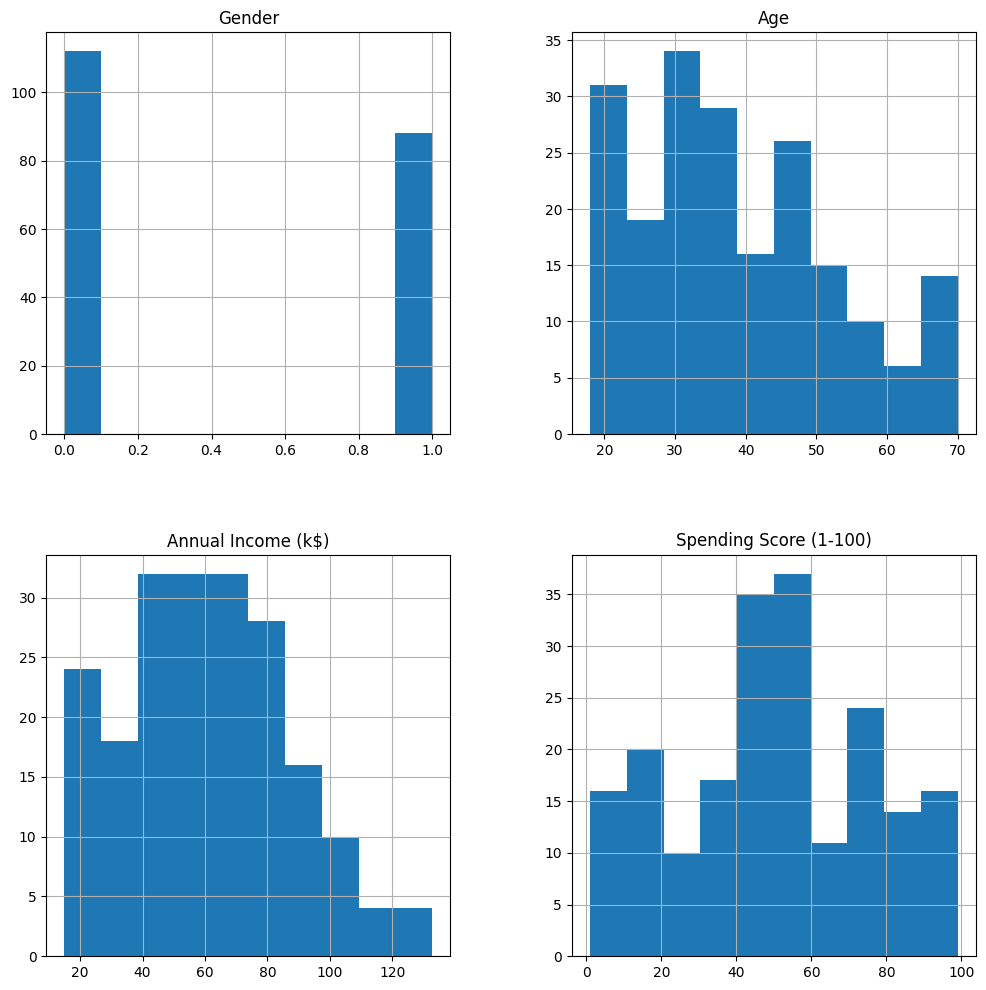

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(12, 12))
plt.show()

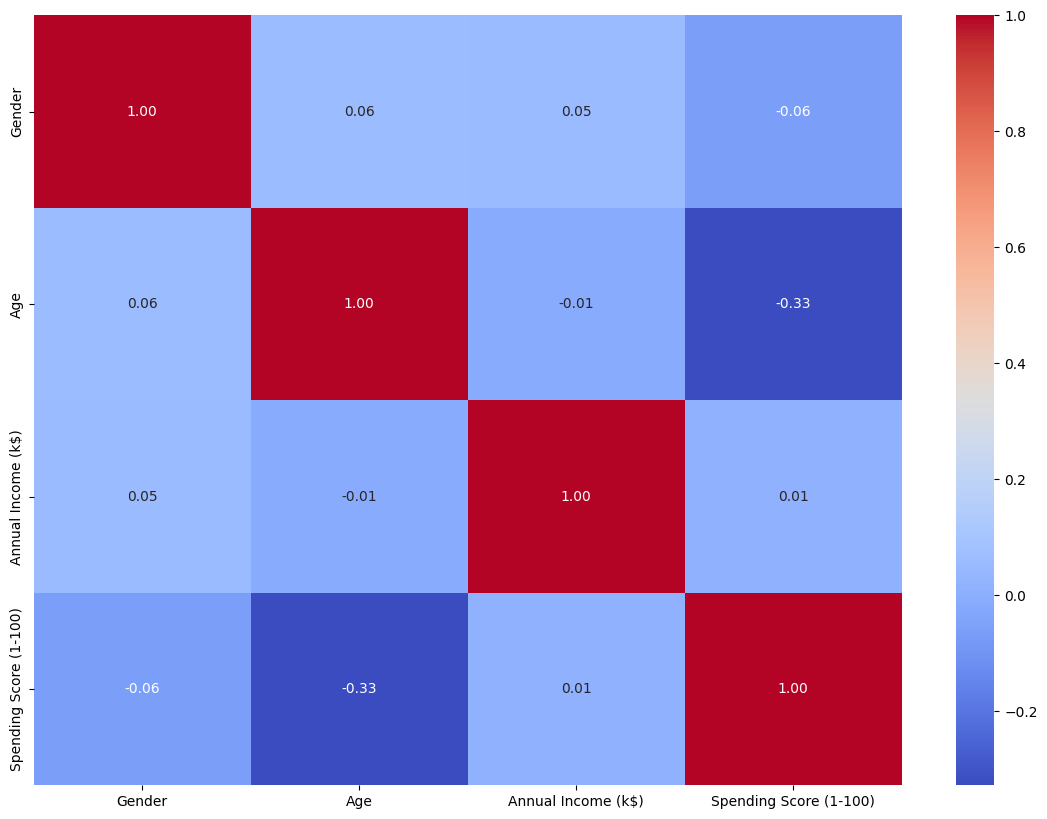

In [ ]:
plt.figure(figsize=(14,10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

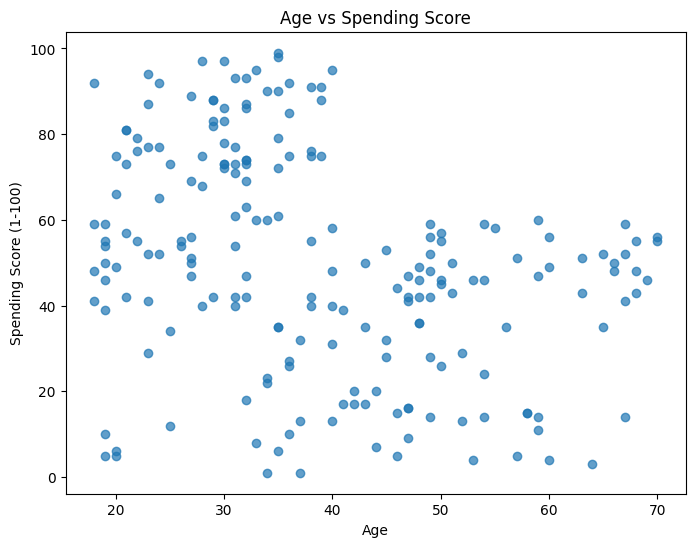

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['Age'], df['Spending Score (1-100)'], alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("Age vs Spending Score")
plt.show()

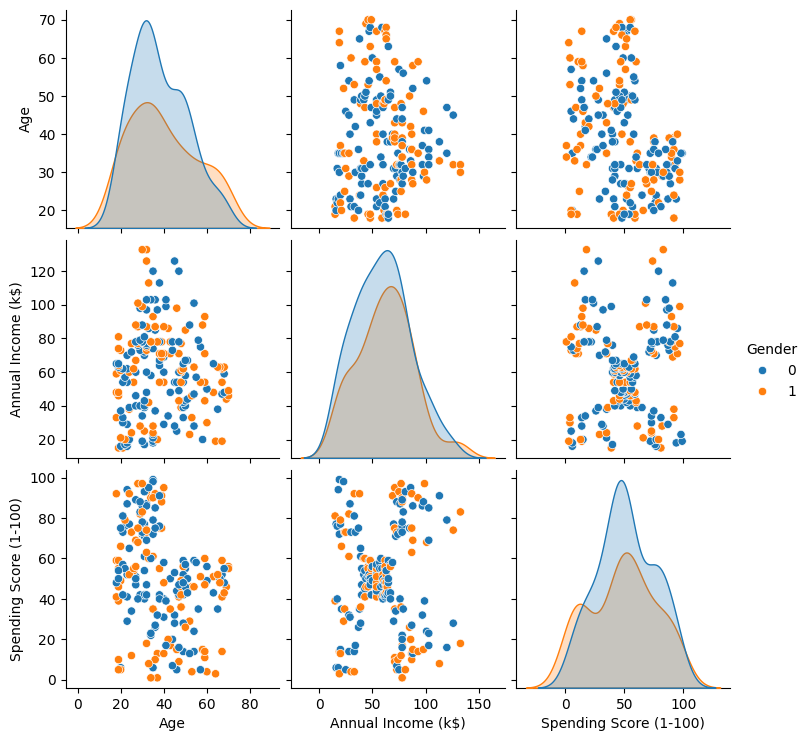

In [ ]:
import seaborn as sns

sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']],
             hue="Gender", diag_kind="kde")
plt.show()


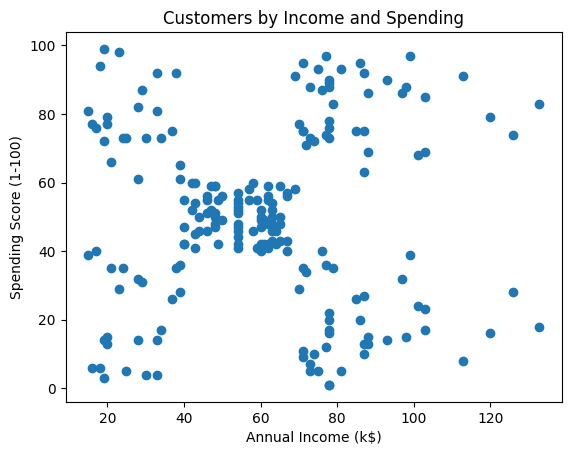

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customers by Income and Spending")
plt.show()

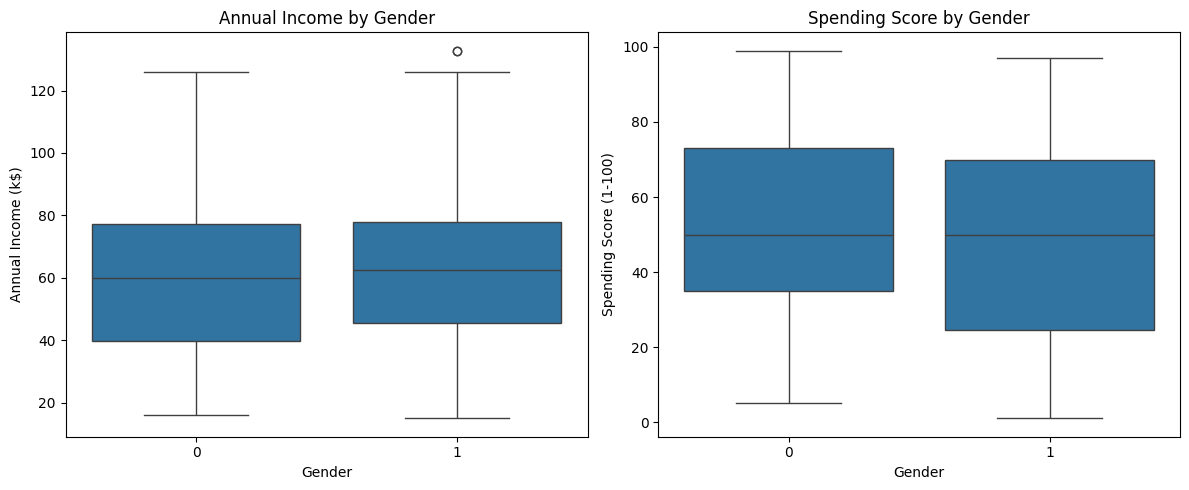

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x="Gender", y="Annual Income (k$)", data=df)
plt.title("Annual Income by Gender")

plt.subplot(1,2,2)
sns.boxplot(x="Gender", y="Spending Score (1-100)", data=df)
plt.title("Spending Score by Gender")

plt.tight_layout()
plt.show()


In [ ]:
df['income to spending ratio'] = df['Spending Score (1-100)'] / df['Annual Income (k$)']
df['income to spending ratio'].head()

,income to spending ratio
0,2.600000
1,5.400000
2,0.375000
3,4.812500
4,2.352941


# Model Selection & Training

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

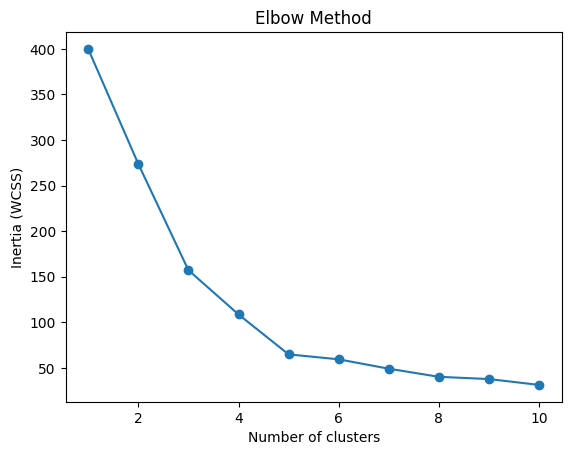

In [ ]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11), inertia, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

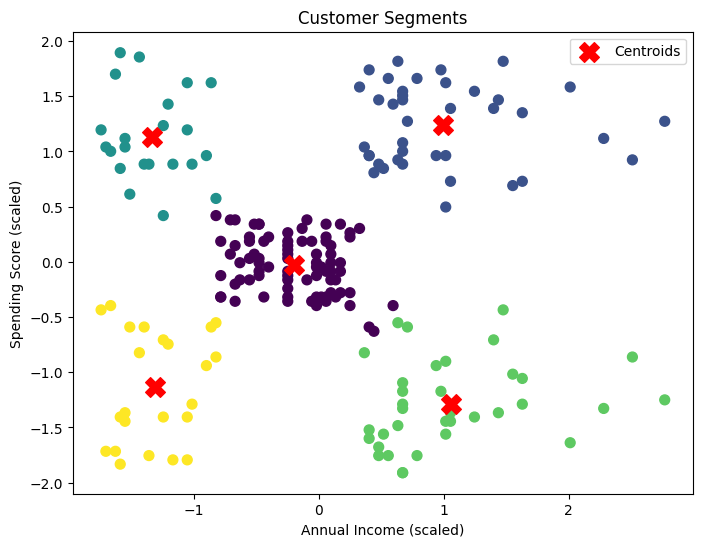

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=df['Cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='red', s=200, marker='X', label='Centroids')
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Customer Segments")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, df['Cluster'])
print("Silhouette Score:", score)

Silhouette Score: 0.5555014501078793


In [ ]:
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k}, silhouette score={score:.2f}")

k=2, silhouette score=0.40
k=3, silhouette score=0.47
k=4, silhouette score=0.49
k=5, silhouette score=0.56
k=6, silhouette score=0.51
k=7, silhouette score=0.50
k=8, silhouette score=0.47
k=9, silhouette score=0.44


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

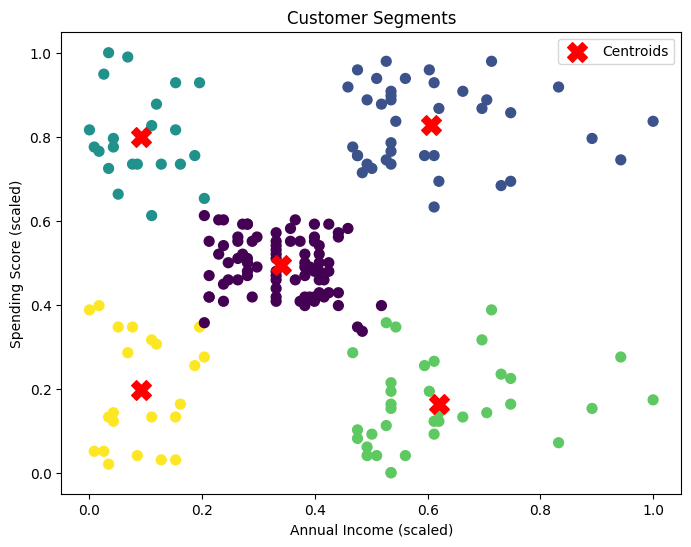

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=df['Cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='red', s=200, marker='X', label='Centroids')
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Customer Segments")
plt.legend()
plt.show()